In [3]:
# Regularization technique is used to find the best feature ( columns ) for the best prediction

# which reduces the coefficient value to minimum which results in better feature selection

# Also improve the model and reduce the over-fitting(higer values 500x1 + 400x2 +.........nxn)

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
n=pd.read_csv("pokemon.csv")
n.head(2)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False


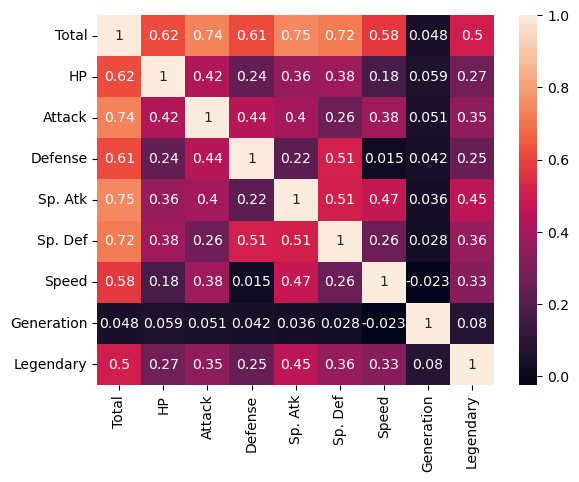

In [4]:
sns.heatmap(data=n.iloc[:,4:].corr(),annot=True)
plt.show()

In [12]:
x=n.iloc[:,4:12]
y=n["Legendary"]

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regularization

In [22]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
lr=LinearRegression()
lr.fit(x_train,y_train) 

LinearRegression()

In [23]:
lr.score(x_test,y_test)*100

18.191852141257502

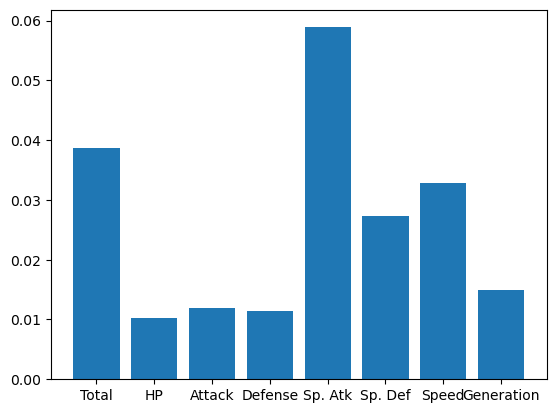

In [24]:
plt.bar(x.columns,lr.coef_)
plt.show()

# Lasso Regularization (L1)


In [42]:
# Best feature selection 
# which reduces the magnitude of the co-efficient value to exact Zero
# refer video or photo's
la=Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_train,y_train)*100

27.88315047844798

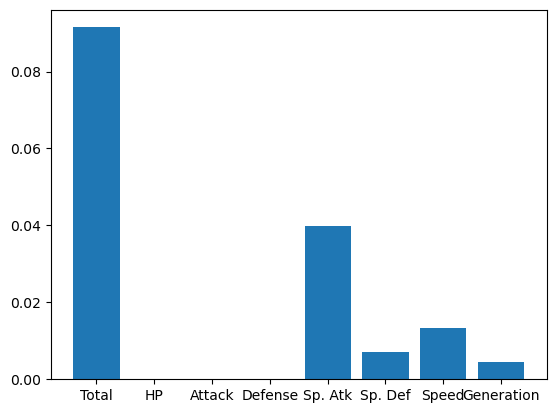

In [43]:
plt.bar(x.columns,la.coef_)
plt.show()

# Ridge Regularization (L2)

In [39]:
ri=Ridge(alpha=0.01)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

18.191965373972817

In [40]:
ri.coef_

array([0.03875969, 0.01031508, 0.01196784, 0.01139285, 0.05886932,
       0.02737685, 0.03284244, 0.01499747])

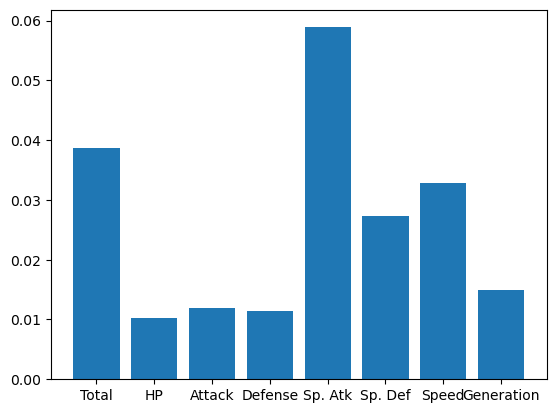

In [41]:
plt.bar(x.columns,ri.coef_)
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [52]:
# Linear Regularization

print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

0.04793446163598193
0.16134589171935007
0.21893940174391163


In [53]:
# Lasso Regularization

print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

0.047104648856558275
0.15663224100952175
0.2170360542779892


In [55]:
# Ridge Regularization

print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

0.0479343952886878
0.1613456009604903
0.21893925022409252


In [56]:
#  camparing the coeficient values

pd.DataFrame({"x_columns":x.columns,"Linear Regularization":lr.coef_,"Lasso Regularization":la.coef_,"Ridge Regularization":ri.coef_})

,x_columns,Linear Regularization,Lasso Regularization,Ridge Regularization
0,Total,0.038760,0.091497,0.038760
1,HP,0.010315,0.000000,0.010315
2,Attack,0.011968,0.000000,0.011968
3,Defense,0.011393,0.000000,0.011393
4,Sp. Atk,0.058870,0.039883,0.058869
5,Sp. Def,0.027377,0.006983,0.027377
6,Speed,0.032843,0.013242,0.032842
7,Generation,0.014998,0.004569,0.014997
